In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tqdm
import logging
import datetime

plt.rc('font', family='Malgun Gothic') # 폰트 지정

In [2]:
# 로그 생성
logger = logging.getLogger()

# 로그의 출력 기준 설정
logger.setLevel(logging.INFO)

# log 출력 형식
formatter = logging.Formatter('%(asctime)s - %(name)s - %(levelname)s - %(message)s')

# log 출력
stream_handler = logging.StreamHandler()
stream_handler.setFormatter(formatter)
logger.addHandler(stream_handler)

# log를 파일에 출력
file_handler = logging.FileHandler('D:\\통계청 공모전\\코드\\모델개발단계_전처리로그파일_{:%Y%m%d}.log'.format(datetime.datetime.now()), 
                                   encoding='utf-8')
file_handler.setFormatter(formatter)
logger.addHandler(file_handler)

In [2]:
train = pd.read_csv('../실습용.csv', encoding='cp949')
train

,digit_1,digit_2,digit_3,Full Text
0,S,95,952,카센터에서 자동차부분정비 타이어오일교환
1,G,47,472,상점내에서 일반인을 대상으로 채소.과일판매
2,G,46,467,절단하여사업체에도매 공업용고무를가지고 합성고무도매
3,G,47,475,영업점에서 일반소비자에게 열쇠잠금장치
4,Q,87,872,어린이집 보호자의 위탁을 받아 취학전아동보육
...,...,...,...,...
999995,C,13,134,제품입고 워싱 청바지워싱
999996,F,42,424,현장에서 고객의요청에의해 실내인테리어
999997,G,47,474,영업점에서 일반소비자에게 여성의류 판매
999998,P,85,856,사업장에서 일반고객을대상으로 필라테스


In [3]:
print(train['digit_1'].value_counts())
print(train['digit_2'].value_counts())
print(train['digit_3'].value_counts())

G    246472
I    187425
C    105192
S    100396
H     98038
P     46610
L     40140
Q     36087
F     35050
R     29751
M     28434
N     17701
J     10862
K     10378
O      2965
E      2255
A      1064
D       756
B       424
Name: digit_1, dtype: int64
56    173459
47    162202
49     90486
46     76835
96     56210
       ...  
39        29
6          7
8          3
12         3
5          1
Name: digit_2, Length: 74, dtype: int64
561    123703
562     49756
493     49115
961     43040
492     39176
        ...  
80          3
120         3
652         2
61          1
51          1
Name: digit_3, Length: 225, dtype: int64


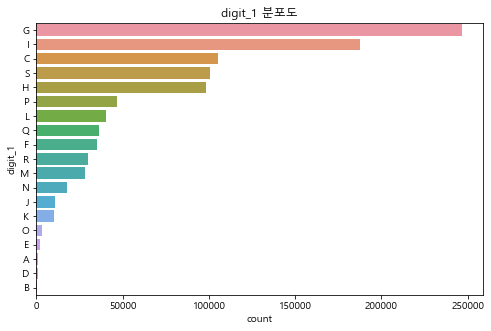

In [19]:
plt.figure(figsize=(8,5))
sns.countplot(y='digit_1', data=train, order=train['digit_1'].value_counts().index)
plt.title('digit_1 분포도')
plt.show()

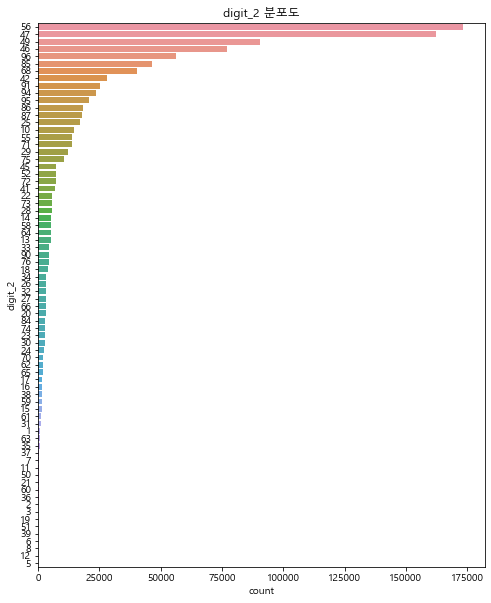

In [17]:
plt.figure(figsize=(8,10))
sns.countplot(y='digit_2', data=train, order=train['digit_2'].value_counts().index)
plt.title('digit_2 분포도')
plt.show()

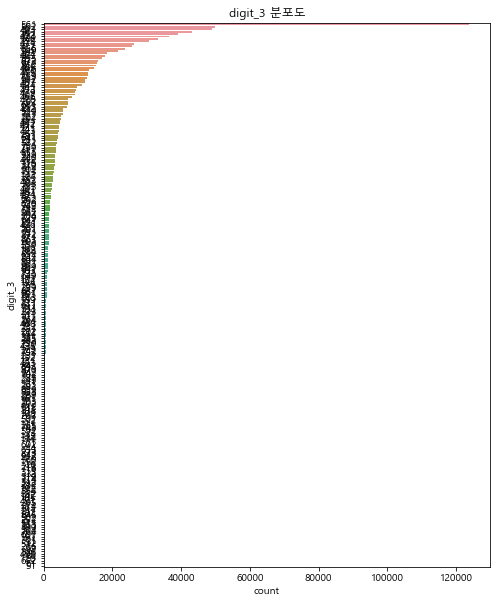

In [18]:
plt.figure(figsize=(8,10))
sns.countplot(y='digit_3', data=train, order=train['digit_3'].value_counts().index)
plt.title('digit_3 분포도')
plt.show()

In [5]:
# # digit_1 LabelEncoding로 변환
# from sklearn.preprocessing import LabelEncoder

# train['digit_1'] = LabelEncoder().fit_transform(train['digit_1'])
# train['digit_1']

In [6]:
# train['digit_1'].value_counts()

In [7]:
print(train['digit_1'].nunique())
print(train['digit_2'].nunique())
print(train['digit_3'].nunique())

19
74
225


In [8]:
test = pd.read_csv('../모델개발용.csv', encoding='cp949')
test

,digit_1,digit_2,digit_3,Full Text
0,NaN,NaN,NaN,치킨전문점에서 고객의주문에의해 치킨판매
1,NaN,NaN,NaN,산업공구 다른 소매업자에게 철물 수공구
2,NaN,NaN,NaN,절에서 신도을 대상으로 불교단체운영
3,NaN,NaN,NaN,영업장에서 고객요구로 자동차튜닝
4,NaN,NaN,NaN,"실내포장마차에서 접객시설을 갖추고 소주,맥주제공"
...,...,...,...,...
99995,NaN,NaN,NaN,사업장에서 일반인대상으로 버섯농장
99996,NaN,NaN,NaN,한의원에서 외래환자위주고 치료
99997,NaN,NaN,NaN,일반점포에서 소비자에게 그림판매
99998,NaN,NaN,NaN,사업장에서 일반인.학생대상으로 학습공간제공


In [9]:
df = pd.concat([train,test], ignore_index=True, axis=0)
df

,digit_1,digit_2,digit_3,Full Text
0,S,95.0,952.0,카센터에서 자동차부분정비 타이어오일교환
1,G,47.0,472.0,상점내에서 일반인을 대상으로 채소.과일판매
2,G,46.0,467.0,절단하여사업체에도매 공업용고무를가지고 합성고무도매
3,G,47.0,475.0,영업점에서 일반소비자에게 열쇠잠금장치
4,Q,87.0,872.0,어린이집 보호자의 위탁을 받아 취학전아동보육
...,...,...,...,...
1099995,NaN,NaN,NaN,사업장에서 일반인대상으로 버섯농장
1099996,NaN,NaN,NaN,한의원에서 외래환자위주고 치료
1099997,NaN,NaN,NaN,일반점포에서 소비자에게 그림판매
1099998,NaN,NaN,NaN,사업장에서 일반인.학생대상으로 학습공간제공


In [10]:
logging.info('모델개발단계_전처리(특수기호 제거)')

2022-04-12 20:50:39,364 - root - INFO - 모델개발단계_전처리(특수기호 제거)


In [11]:
# 특수기호 제거
import re

# 특수기호를 나열한 패턴 문자열을 컴파일하여 패턴 객체를 얻는다.
p = re.compile('[\!@#$%\^&\*\(\)\-\=\[\]\{\}\.,/\?~\+\'"|_:;><`┃]')

# 문장의 특수기호 제거 함수
def remove_special_characters(sentence, lower=True):
    sentence = p.sub(' ', sentence) # 패턴 객체로 sentence 내의 특수기호를 공백문자로 치환한다.
    sentence = ' '.join(sentence.split()) # sentence 내의 두개 이상 연속된 빈공백들을 하나의 빈공백으로 만든다.
    if lower:
        sentence = sentence.lower()
    return sentence

# Full Text 칼럼에 특수기호를 제거하는 함수를 적용한 결과를 반환한다.
df['Full Text'] = df['Full Text'].map(remove_special_characters)

df.head() # 특수기호가 제거된 df의 상단 5행만 출력

,digit_1,digit_2,digit_3,Full Text
0,S,95.0,952.0,카센터에서 자동차부분정비 타이어오일교환
1,G,47.0,472.0,상점내에서 일반인을 대상으로 채소 과일판매
2,G,46.0,467.0,절단하여사업체에도매 공업용고무를가지고 합성고무도매
3,G,47.0,475.0,영업점에서 일반소비자에게 열쇠잠금장치
4,Q,87.0,872.0,어린이집 보호자의 위탁을 받아 취학전아동보육


In [12]:
#word count
word_counts = df['Full Text'].apply(lambda x:len(x.split(' ')))
word_counts.head()

0    3
1    5
2    3
3    3
4    5
Name: Full Text, dtype: int64

In [13]:
print('단어 개수 최댓값: {}'.format(np.max(word_counts)))
print('단어 개수 최솟값: {}'.format(np.min(word_counts)))
print('단어 개수 평균값: {:.2f}'.format(np.mean(word_counts)))
print('단어 개수 표준편차: {:.2f}'.format(np.std(word_counts)))
print('단어 개수 중간값: {}'.format(np.median(word_counts)))
# 사분위의 대한 경우는 0~100 스케일로 돼 있음
print('단어 개수 제1사분위: {}'.format(np.percentile(word_counts, 25)))
print('단어 개수 제3사분위: {}'.format(np.percentile(word_counts, 75)))

단어 개수 최댓값: 21
단어 개수 최솟값: 1
단어 개수 평균값: 4.20
단어 개수 표준편차: 1.40
단어 개수 중간값: 4.0
단어 개수 제1사분위: 3.0
단어 개수 제3사분위: 5.0


In [14]:
# 하나의 리스트로 만들어서 value_counts(), nunique()
one_list = df['Full Text'].apply(lambda x:x.split(' '))
one_list

0                [카센터에서, 자동차부분정비, 타이어오일교환]
1            [상점내에서, 일반인을, 대상으로, 채소, 과일판매]
2          [절단하여사업체에도매, 공업용고무를가지고, 합성고무도매]
3                 [영업점에서, 일반소비자에게, 열쇠잠금장치]
4           [어린이집, 보호자의, 위탁을, 받아, 취학전아동보육]
                        ...               
1099995             [사업장에서, 일반인대상으로, 버섯농장]
1099996               [한의원에서, 외래환자위주고, 치료]
1099997              [일반점포에서, 소비자에게, 그림판매]
1099998       [사업장에서, 일반인, 학생대상으로, 학습공간제공]
1099999              [사업장에서, 대리현대아파트를, 관리]
Name: Full Text, Length: 1100000, dtype: object

In [15]:
list_all = []
for i in range(len(one_list)):
    for j in range(len(one_list[i])):
        list_all.append(one_list[i][j])
list_all

['카센터에서',
 '자동차부분정비',
 '타이어오일교환',
 '상점내에서',
 '일반인을',
 '대상으로',
 '채소',
 '과일판매',
 '절단하여사업체에도매',
 '공업용고무를가지고',
 '합성고무도매',
 '영업점에서',
 '일반소비자에게',
 '열쇠잠금장치',
 '어린이집',
 '보호자의',
 '위탁을',
 '받아',
 '취학전아동보육',
 '철',
 '절삭',
 '용접',
 '카프라배관자재',
 '음식점에서',
 '접객시설을',
 '갖추고',
 '참치회',
 '일본식',
 '쌀을',
 '가지고',
 '가공하여',
 '떡제조',
 '시청에서',
 '재정과인력',
 '일반공공행정',
 '지방행정',
 '집행',
 '영업장에서',
 '고객의뢰를',
 '받아',
 '내부전기공사',
 '멸치',
 '입고',
 '가공',
 '음식점',
 '접객시설을',
 '갖추고',
 '냉면',
 '매장에서',
 '일반인',
 '대상으로',
 '의류소매',
 '음식점에서',
 '접객시설을',
 '갖추고',
 '회',
 '상점내',
 '일반인을',
 '대상으로',
 '여러곡물소매판매',
 '태권도장에서',
 '학생및일반대사으로',
 '태권도',
 '사업장에서',
 '고객요청으로',
 '자동차세차업',
 '선박',
 '화물',
 '운송화물',
 '검수',
 '매장에서',
 '일반인에게',
 '핸드폰소매',
 '영업장에서',
 '일반',
 '고객을',
 '대상',
 '자동차',
 '임대업',
 '쌀을가지고',
 '가루로',
 '분쇄하여',
 '떡을',
 '쪄서',
 '백설기',
 '꿀떡',
 '절편판매',
 '당구',
 '유흥주점에서',
 '무도시설을',
 '갖추고',
 '술판매',
 '점포에서',
 '일반인대상으로소매',
 '건어물',
 '음료점에서',
 '빙수',
 '아이스크림',
 '커피',
 '디저트',
 '제공',
 '커피',
 '빙수등을제공',
 '영업점에서',
 '일반소비자에게',
 '오징어빵판매',
 '고무',
 '절단가공',
 '가스켓',
 '다이아후레임',
 '사

In [16]:
word_list = pd.Series(list_all)
word_list

0             카센터에서
1           자동차부분정비
2           타이어오일교환
3             상점내에서
4              일반인을
             ...   
4617340      학생대상으로
4617341      학습공간제공
4617342       사업장에서
4617343    대리현대아파트를
4617344          관리
Length: 4617345, dtype: object

In [17]:
word_list.value_counts()

대상으로        139241
사업장에서       139060
갖추고         101880
매장에서         81124
접객시설을        79540
             ...  
교육원생을            1
기계라인청소           1
휴게소구내식당          1
천주교걔통            1
대리현대아파트를         1
Length: 319323, dtype: int64

In [18]:
word_list.nunique()

319323

In [19]:
logging.info('모델개발단계_불용어제거')

2022-04-12 20:50:50,786 - root - INFO - 모델개발단계_불용어제거


In [20]:
from konlpy.tag import Okt  
okt=Okt()  

In [21]:
text = okt.morphs(df['Full Text'][0])
text

['카', '센터', '에서', '자동차', '부분', '정비', '타이어', '오일', '교환']

In [22]:
stop_words =set(['에서','에게','의','에','의해','을','를','으로','및','로','등'])
clean_text = [token for token in text if not token in stop_words]
clean_text

['카', '센터', '자동차', '부분', '정비', '타이어', '오일', '교환']

In [23]:
def preprocessing(text, okt, stop_words = []):
    text = okt.morphs(text)
    text = [token for token in text if not token in stop_words]
    return text

In [24]:
stop_words = ['에서','에게','의','에','의해','을','를','으로','및','로','등']
okt = Okt()
clean_text = []        
for text in tqdm.tqdm(df['Full Text']):
     clean_text.append(preprocessing(text, okt, stop_words=stop_words))
clean_text

100%|███████████████████████████████████████████████████████████████████████| 1100000/1100000 [38:27<00:00, 476.75it/s]


[['카', '센터', '자동차', '부분', '정비', '타이어', '오일', '교환'],
 ['상점', '내', '일반인', '대상', '채소', '과일', '판매'],
 ['절단', '하여사', '업체', '에도', '매', '공업', '용', '고무', '가지', '고', '합성', '고무', '도매'],
 ['영업', '점', '일', '반', '소비자', '열쇠', '잠금장치'],
 ['어린이집', '보호자', '위탁', '받아', '취학', '전', '아동', '보육'],
 ['철', '절삭', '용접', '카프', '라', '배관', '자재'],
 ['음식점', '접객', '시설', '갖추고', '참치회', '일본', '식'],
 ['쌀', '가지', '고', '가공', '하여', '떡', '제조'],
 ['시청', '재정', '과', '인력', '일', '반', '공공', '행정', '지방행정', '집행'],
 ['영업', '장', '고객', '의뢰', '받아', '내부', '전', '기공사'],
 ['멸치', '입고', '가공'],
 ['음식점', '접객', '시설', '갖추고', '냉면'],
 ['매장', '일반인', '대상', '의류', '소매'],
 ['음식점', '접객', '시설', '갖추고', '회'],
 ['상점', '내', '일반인', '대상', '여러', '곡물', '소', '매', '판매'],
 ['태권도', '장', '학생', '일반', '대', '사으로', '태권도'],
 ['사업', '장', '고객', '요청', '자동차', '세차', '업'],
 ['선박', '화물', '운송', '화물', '검수'],
 ['매장', '일반인', '핸드폰', '소매'],
 ['영업', '장', '일반', '고객', '대상', '자동차', '임대', '업'],
 ['쌀을가지고', '가루', '분쇄', '하여', '떡', '쪄서', '백설기', '꿀떡', '절편', '판매'],
 ['당구'],
 ['유흥주점', '무도', '시설', '갖추고

In [25]:
a = []
for i in range(len(df)):
    a.append(" ".join(clean_text[i]))
a

['카 센터 자동차 부분 정비 타이어 오일 교환',
 '상점 내 일반인 대상 채소 과일 판매',
 '절단 하여사 업체 에도 매 공업 용 고무 가지 고 합성 고무 도매',
 '영업 점 일 반 소비자 열쇠 잠금장치',
 '어린이집 보호자 위탁 받아 취학 전 아동 보육',
 '철 절삭 용접 카프 라 배관 자재',
 '음식점 접객 시설 갖추고 참치회 일본 식',
 '쌀 가지 고 가공 하여 떡 제조',
 '시청 재정 과 인력 일 반 공공 행정 지방행정 집행',
 '영업 장 고객 의뢰 받아 내부 전 기공사',
 '멸치 입고 가공',
 '음식점 접객 시설 갖추고 냉면',
 '매장 일반인 대상 의류 소매',
 '음식점 접객 시설 갖추고 회',
 '상점 내 일반인 대상 여러 곡물 소 매 판매',
 '태권도 장 학생 일반 대 사으로 태권도',
 '사업 장 고객 요청 자동차 세차 업',
 '선박 화물 운송 화물 검수',
 '매장 일반인 핸드폰 소매',
 '영업 장 일반 고객 대상 자동차 임대 업',
 '쌀을가지고 가루 분쇄 하여 떡 쪄서 백설기 꿀떡 절편 판매',
 '당구',
 '유흥주점 무도 시설 갖추고 술 판매',
 '점포 일반인 대상 소매 건어물',
 '음료 점 빙수 아이스크림 커피 디저트 제공 커피 빙수 제공',
 '영업 점 일 반 소비자 오징어 빵 판매',
 '고무 절단 가공 가스 켓 다이아 후레임',
 '사무실 직원 들 대상 교육 관',
 '미용실 일반인 대상 컷 파마',
 'resim 재료 구입 세미 앗세이',
 '사업 장 소비자 대상 가정 용 가스 소매',
 '생 지를 구입 하여 가공 업체 가공 의뢰 하 여 완제 품 수출 폴리에스테르 원단 직물',
 '음식점 접객 시설 갖추고 소 갈비살',
 '세탁소 고객 의뢰 받아 가정 용 세탁물 세탁',
 '음식점 접객 시설 갖추고 치킨',
 '음식점 접객 시설 갖추고 중화요리',
 '교회 기독교 계통 종교 활동 종교 서비스',
 '카페 접객 시설 갖추고 커피 음료수',
 '가게 고객 잡화 판매',
 '교회 기독교 계통 종교 활

In [26]:
df['clean_text'] = a
df

,digit_1,digit_2,digit_3,Full Text,clean_text
0,S,95.0,952.0,카센터에서 자동차부분정비 타이어오일교환,카 센터 자동차 부분 정비 타이어 오일 교환
1,G,47.0,472.0,상점내에서 일반인을 대상으로 채소 과일판매,상점 내 일반인 대상 채소 과일 판매
2,G,46.0,467.0,절단하여사업체에도매 공업용고무를가지고 합성고무도매,절단 하여사 업체 에도 매 공업 용 고무 가지 고 합성 고무 도매
3,G,47.0,475.0,영업점에서 일반소비자에게 열쇠잠금장치,영업 점 일 반 소비자 열쇠 잠금장치
4,Q,87.0,872.0,어린이집 보호자의 위탁을 받아 취학전아동보육,어린이집 보호자 위탁 받아 취학 전 아동 보육
...,...,...,...,...,...
1099995,NaN,NaN,NaN,사업장에서 일반인대상으로 버섯농장,사업 장 일반인 대상 버섯 농장
1099996,NaN,NaN,NaN,한의원에서 외래환자위주고 치료,한의원 외래 환자 위주 고 치료
1099997,NaN,NaN,NaN,일반점포에서 소비자에게 그림판매,일 반 점포 소비자 그림 판매
1099998,NaN,NaN,NaN,사업장에서 일반인 학생대상으로 학습공간제공,사업 장 일반인 학생 대상 학습 공간 제공


In [27]:
df.to_csv('최종 전처리.csv',index=False, encoding='utf-8-sig')

# 토큰나이징

In [28]:
# from tensorflow.python.keras.preprocessing.sequence import pad_sequences
# from tensorflow.python.keras.preprocessing.text import Tokenizer

In [29]:
# tokenizer = Tokenizer()
# tokenizer.fit_on_texts(df['Full Text'])
# sequences = tokenizer.texts_to_sequences(df['Full Text'])

In [30]:
# data = sequences
# data

In [31]:
# word_vocab = tokenizer.word_index
# word_vocab

In [32]:
# len(word_vocab)

# SentencePiece로 토큰나이징 진행
* 상품명으로 학습되는 분절기 사용 
* input : 학습시킬 파일
* model_prefix : 만들어질 모델 이름
* vocab_size : 단어 집합의 크기
* model_type : 사용할 모델 (unigram(default), bpe, char, word)
* max_sentence_length: 문장의 최대 길이

In [33]:
logging.info('모델개발단계_SentencePiece 토큰나이징')

2022-04-12 21:29:23,439 - root - INFO - 모델개발단계_SentencePiece 토큰나이징


In [1]:
import sentencepiece as spm

In [35]:
# product 칼럼의 상품명을 product.txt 파일명으로 저장한다.
with open('text.txt', 'w', encoding='utf-8') as f:
    f.write(df['clean_text'].str.cat(sep='\n'))

In [36]:
# 보통 학습을 진행하기 위해서 vocab_size 25,000 ~ 35,000 정도로 함
# 문장 최대 길이는 분석한 결과 21개 단어임
spm.SentencePieceTrainer.Train('--input=text.txt --model_type=bpe --model_prefix=text --vocab_size=10760 \
                               --max_sentence_length=21 --shuffle_input_sentence=true')

In [37]:
# 센텐스피스 모델을 로드한다.
sp = spm.SentencePieceProcessor()
sp.Load('text.model')

# product 칼럼의 상품명을 분절한 결과를 tokenized_product 칼럼에 저장한다.
df['tokens'] = df['clean_text'].map(lambda x: " ".join(sp.EncodeAsPieces(x)) )

df.head()

,digit_1,digit_2,digit_3,Full Text,clean_text,tokens
0,S,95.0,952.0,카센터에서 자동차부분정비 타이어오일교환,카 센터 자동차 부분 정비 타이어 오일 교환,▁카 ▁센터 ▁자동차 ▁부분 ▁정비 ▁타이어 ▁오일 ▁교환
1,G,47.0,472.0,상점내에서 일반인을 대상으로 채소 과일판매,상점 내 일반인 대상 채소 과일 판매,▁상 점 ▁내 ▁일반인 ▁대상 ▁채소 ▁과일 ▁판매
2,G,46.0,467.0,절단하여사업체에도매 공업용고무를가지고 합성고무도매,절단 하여사 업체 에도 매 공업 용 고무 가지 고 합성 고무 도매,▁절단 ▁하여 사 ▁업체 ▁에 도 ▁매 ▁공업 ▁용 ▁고무 ▁가 지 ▁고 ▁합성 ▁...
3,G,47.0,475.0,영업점에서 일반소비자에게 열쇠잠금장치,영업 점 일 반 소비자 열쇠 잠금장치,▁영업 ▁점 ▁일 ▁반 ▁소비자 ▁열쇠 ▁잠 금 장치
4,Q,87.0,872.0,어린이집 보호자의 위탁을 받아 취학전아동보육,어린이집 보호자 위탁 받아 취학 전 아동 보육,▁어린이집 ▁보호 자 ▁위탁 ▁ 받 아 ▁취 학 ▁전 ▁아동 ▁보육


In [38]:
lines = [
  "카 센터 자동차 부분 정비 타이어 오일 교환",
  "상점 내 일반인 대상 채소 과일 판매",
]
for line in lines:
    print(line)
    print(sp.encode_as_pieces(line))
    print(sp.encode_as_ids(line))
    print()

카 센터 자동차 부분 정비 타이어 오일 교환
['▁카', '▁센터', '▁자동차', '▁부분', '▁정비', '▁타이어', '▁오일', '▁교환']
[111, 622, 163, 2469, 1228, 633, 1945, 3832]

상점 내 일반인 대상 채소 과일 판매
['▁상', '점', '▁내', '▁일반인', '▁대상', '▁채소', '▁과일', '▁판매']
[135, 10034, 355, 779, 2897, 296, 147, 12]



In [39]:
text = []

for i in tqdm.tqdm(df['clean_text']):
    text.append(sp.encode_as_ids(i))

text = np.array(text)
text

100%|█████████████████████████████████████████████████████████████████████| 1100000/1100000 [00:30<00:00, 36376.61it/s]
C:\Users\user\AppData\Local\Temp/ipykernel_12628/3225669677.py:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  text = np.array(text)


array([list([111, 622, 163, 2469, 1228, 633, 1945, 3832]),
       list([135, 10034, 355, 779, 2897, 296, 147, 12]),
       list([94, 1302, 10046, 1036, 577, 10048, 25, 1324, 41, 608, 18, 10109, 52, 1304, 608, 23]),
       ..., list([35, 160, 1000, 1444, 1030, 12]),
       list([109, 37, 779, 392, 2897, 1434, 1726, 49]),
       list([109, 37, 223, 405, 44, 1310, 203])], dtype=object)

In [40]:
# numpy 파일로 저장
np.save('D:/통계청 공모전/text.npy',text)